**Author** : Asad Mujeeb

**Model** : Logistic Regression

**Email** : asadmujeeb559@gmail.com

**Portfolio** : [Linkeidn](https://www.linkedin.com/in/asadmujeeb)

# `Logistic Regression `

*Logistic regression is a popular statistical model used for binary classification tasks. It is commonly used when the dependent variable (the variable we want to predict) is categorical and has two possible outcomes, such as "yes" or "no", "spam" or "not spam", or "fraudulent" or "non-fraudulent".*

In logistic regression, we aim to find the best-fitting line (or hyperplane) that separates the two classes in the input data. This line is determined by estimating the probabilities of the input belonging to each class. The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values to a probability between 0 and 1.



## `Typs of Logistic Regression`

**1. Binary Classification**

**2. Multi-class Classification**

**3. Multi-label classification**

## `Assumptions in Logistic Regression`

1. The dependent variable must be categorical in nature.

2. The independent variable (feature) must be independent.

3. There  should be no outliers in the dataset

4. There should not high correlation in the data


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,classification_report

In [15]:
# laod dataset

df = sns.load_dataset("titanic")

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# pre-processing

# drop the deck column
df.drop("deck", axis = 1, inplace = True)

# impute the missing age and fare column
df["age"].fillna(df["age"].mean(), inplace = True)
df["fare"].fillna(df["fare"].mean(), inplace = True)

In [18]:
# impute the embarked and embark_town column
df["embarked"].fillna(df["embarked"].mode()[0], inplace = True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace = True)

# encode the categorical data using for loop where object and categoryc data is present

for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype.name == "category":
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [19]:
x = df.drop("survived", axis=1)

y = df["survived"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [21]:
# model call

model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)

c:\Users\Asad Mujeeb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# predict the model

y_pred = model.predict(x_test)

In [24]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [26]:
# accuracy score

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  1.0


In [27]:
# mean squared error

print("Mean squared error : ", mean_squared_error(y_test, y_pred))

Mean squared error :  0.0


In [28]:
# root mean squared error

print("Root mean squared error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error :  0.0


In [29]:
# r2 score

print("r2 score : ", r2_score(y_test, y_pred))

r2 score :  1.0


In [31]:
# confusion matrix

print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Confusion Matrix :
 [[105   0]
 [  0  74]]


In [34]:
# classification report

print("Classification report :\n", classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



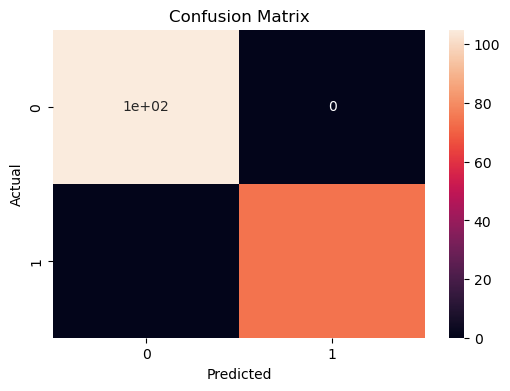

In [39]:
# plot the confusion matrix

plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
# save the model

import pickle

pickle.dump(model, open('./saved_models/02_model_logistic_regression.pkl', 'wb'))